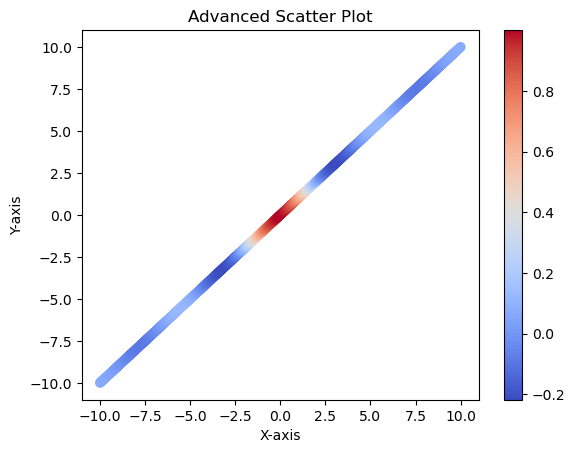

In [1]:
###M4 - W1 Assignment: Visualising the Right Way!
#Question 1:
import numpy as np
import matplotlib.pyplot as plt

# Create x and y arrays
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

# Define z_func
def z_func(x, y):
    r = np.sqrt(x**2 + y**2)
    return np.sin(r) / r

# Use x and y as inputs to z_func to create z array
z = z_func(x, y)

# Create 2D scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=z, cmap='coolwarm')

# Add colorbar to the plot
cb = fig.colorbar(sc)

# Set title and axis labels
ax.set_title('Advanced Scatter Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Save plot as PNG image with 300 DPI resolution
fig.savefig('advanced_scatter_plot.png', dpi=300)


In [32]:
##Question 2):
#Original Graph:The original graph merely displays the raw data without any smoothing or interpolation. Thus, it is more difficult to discern the data's overall trend and any changes in the pattern over time.
#Also, compared to the smoothed data in the first graph, the raw data is noisier and more difficult to interpret.

#Better Graph:This graph is better because the noise in the data is smoothed out in the BETTER graph using a rolling mean and a cubic spline interpolation, it is more effective at displaying the trend in the data. 
#This makes it simpler to see the larger pattern and any long-term trends that alter. A greater understanding of the volatility in the data 
#and the distribution of the responses is also given by the scatter points superimposed over the smooth line.

In [ ]:
#Question 3):
#change the csv to xlsx
import pandas as pd

# Read the CSV file into a dataframe
data= pd.read_csv(r'C:\Users\User\Downloads\brexit.csv')

# Write the dataframe to an XLSX file

data.to_excel(r'C:\Users\User\Downloads\brexit', index=False, sep='|', engine='xlsxwriter')


In [7]:
#Question 3):
#load and check the data
import pandas as pd

# Read the CSV file
data = pd.read_csv(r'C:\Users\User\Downloads\brexit.csv', skiprows=3)

# Replace commas with pipes
data = data.replace(',', '|', regex=True)

# Write the dataframe to an XLSX file
data.to_excel(r'C:\Users\User\Downloads\brexit.xlsx', index=False, engine='xlsxwriter')
print(data)

        Date  % responding right  % responding wrong
0   02/08/16                  46                  42
1   09/08/16                  45                  44
2   17/08/16                  46                  43
3   23/08/16                  45                  43
4   31/08/16                  47                  44
..       ...                 ...                 ...
80  13/08/18                  43                  47
81  14/08/18                  43                  45
82  21/08/18                  41                  47
83  29/08/18                  42                  47
84  04/09/18                  42                  48

[85 rows x 3 columns]


        Date  % responding right  % responding wrong
0   02/08/16                  46                  42
1   09/08/16                  45                  44
2   17/08/16                  46                  43
3   23/08/16                  45                  43
4   31/08/16                  47                  44
..       ...                 ...                 ...
80  13/08/18                  43                  47
81  14/08/18                  43                  45
82  21/08/18                  41                  47
83  29/08/18                  42                  47
84  04/09/18                  42                  48

[85 rows x 3 columns]


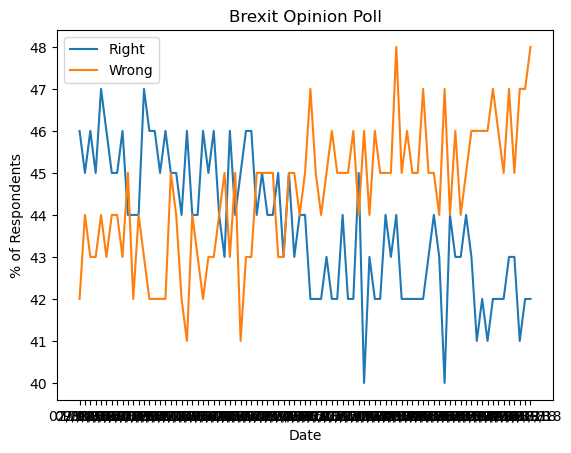

In [11]:
#Question 3):
#left  photo
import pandas as pd

#load the data
data= pd.read_excel(r'C:\Users\User\Downloads\brexit.xlsx')
print(data)

#set the Date column as the index
data.set_index('Date', inplace=True)

#plot the data
plt.plot(data['% responding right'], label='Right')
plt.plot(data['% responding wrong'], label='Wrong')

#set the title and labels for the plot
plt.title('Brexit Opinion Poll')
plt.xlabel('Date')
plt.ylabel('% of Respondents')

#add a legend
plt.legend()

#display the plot
plt.show()

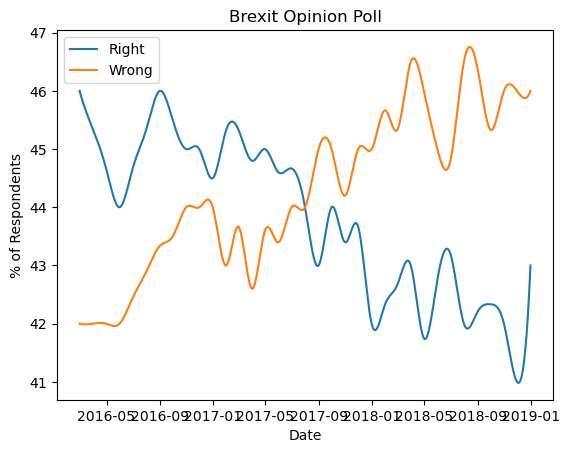

In [30]:
#Question 3):
#second attempt left photo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# load the data
data = pd.read_excel(r'C:\Users\User\Downloads\brexit.xlsx')

# convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

# set the Date column as the index
data.set_index('Date', inplace=True)

# resample the data to a monthly frequency
data_monthly = data.resample('M').mean()

# interpolate missing values
data_monthly.interpolate(method='linear', inplace=True)

# smooth the lines
num_points = len(data_monthly) * 100  # number of points in the smoothed line
x_smooth = pd.date_range(start=data_monthly.index.min(), end=data_monthly.index.max(), periods=num_points)
spl_right = make_interp_spline(data_monthly.index, data_monthly['% responding right'], k=3)
spl_wrong = make_interp_spline(data_monthly.index, data_monthly['% responding wrong'], k=3)
y_smooth_right = spl_right(x_smooth)
y_smooth_wrong = spl_wrong(x_smooth)

# plot the data
plt.plot(x_smooth, y_smooth_right, label='Right')
plt.plot(x_smooth, y_smooth_wrong, label='Wrong')

# set the title and labels for the plot
plt.title('Brexit Opinion Poll')
plt.xlabel('Date')
plt.ylabel('% of Respondents')

# add a legend
plt.legend()

# display the plot
plt.show()




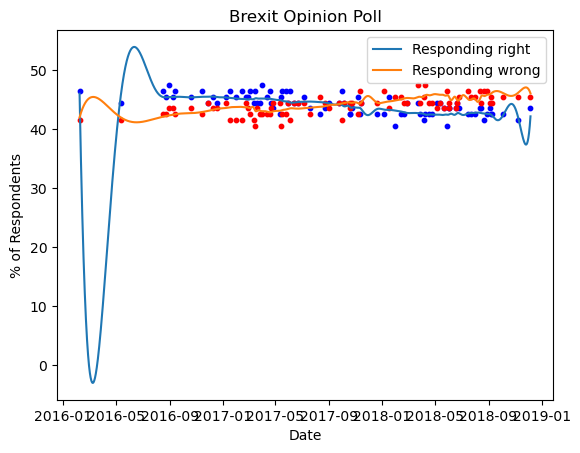

In [21]:
#right photo
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# load the data with parsing the Date column as datetime objects
data = pd.read_excel(r'C:\Users\User\Downloads\brexit.xlsx', parse_dates=['Date'])

# set the Date column as the index
data.set_index('Date', inplace=True)

# sort the index
data = data.sort_index()

# calculate rolling mean of the data with a window size of 7 days
data_smooth = data.rolling(window=7, min_periods=1).mean()
data_smooth_smooth = data_smooth.rolling(window=7, min_periods=1).mean()

# generate cubic spline interpolations for the two data series
num_points = len(data) * 100  # number of points in the smoothed line
x_smooth = pd.date_range(start=data.index.min(), end=data.index.max(), periods=num_points)
spl_right = make_interp_spline(data_smooth_smooth.index, data_smooth_smooth['% responding right'], k=5)
spl_wrong = make_interp_spline(data_smooth_smooth.index, data_smooth_smooth['% responding wrong'], k=5)
y_smooth_right = spl_right(x_smooth)
y_smooth_wrong = spl_wrong(x_smooth)

# plot the smoothed data
plt.plot(x_smooth, y_smooth_right, label='Responding right')
plt.plot(x_smooth, y_smooth_wrong, label='Responding wrong')

# add scatter points to the plot
offset = 0.5
plt.scatter(data.index, data['% responding right'] + offset, s=10, color='blue')
plt.scatter(data.index, data['% responding wrong'] - offset, s=10, color='red')

# set the title and labels for the plot
plt.title('Brexit Opinion Poll')
plt.xlabel('Date')
plt.ylabel('% of Respondents')

# add a legend
plt.legend()

# display the plot
plt.show()


